In [1]:
!pip install -Uqq fastai
!pip install -Uqq timm

In [2]:
import timm
from fastai.vision.all import *

# Meander

In [3]:
meander_path = "drive/MyDrive/parkinsons/Meander"
files = get_image_files(meander_path)
len(files)

264

(560, 550)


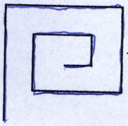

In [4]:
img = PILImage.create(files[65])
print(img.size)
img.to_thumb(128)

In [5]:
# Checking image sizes

from fastcore.parallel import *

def f(o): return PILImage.create(o).size
sizes = parallel(f, files, n_workers=8)
pd.Series(sizes)

0      (612, 554)
1      (576, 546)
2      (588, 572)
3      (612, 554)
4      (595, 564)
          ...    
259    (566, 570)
260    (586, 544)
261    (580, 572)
262    (540, 566)
263    (552, 524)
Length: 264, dtype: object

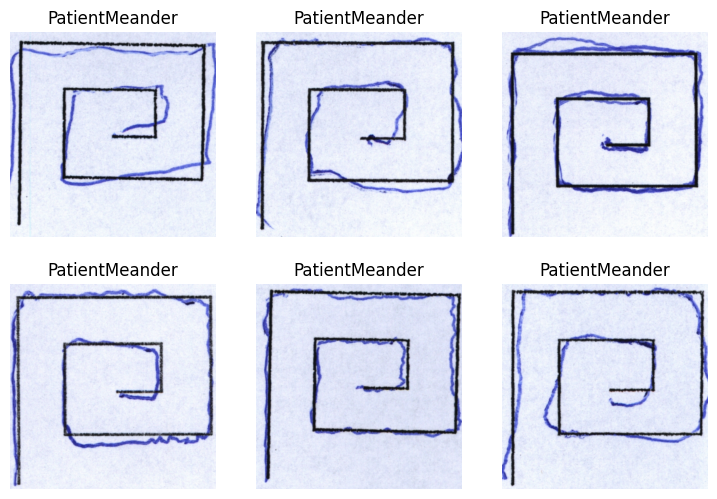

In [6]:
dls = ImageDataLoaders.from_folder(
    meander_path, bs=8, valid_pct=0.2, seed=42,
    item_tfms=Resize(460),
    batch_tfms=[])

dls.show_batch(max_n=6)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0010000000474974513, slide=0.00363078061491251)

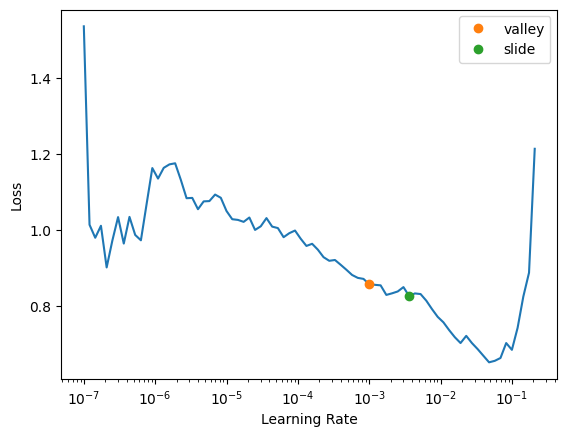

In [7]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.lr_find(suggest_funcs=(valley, slide))

In [8]:
learn.fine_tune(12, 0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.843166,1.710147,0.269231,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.480005,0.860342,0.153846,00:07
1,0.632021,0.116852,0.076923,00:06
2,0.553564,0.880437,0.230769,00:07
3,0.532523,1.433799,0.115385,00:06
4,0.546860,0.891414,0.211538,00:07
5,0.460249,0.157059,0.057692,00:06
6,0.330551,0.133720,0.057692,00:07
7,0.251565,0.048807,0.038462,00:06
8,0.227341,0.125537,0.057692,00:07
9,0.197206,0.072903,0.038462,00:06


# Circle

In [16]:
circle_path = "drive/MyDrive/parkinsons/Spiral"
files = get_image_files(circle_path)
len(files)

268

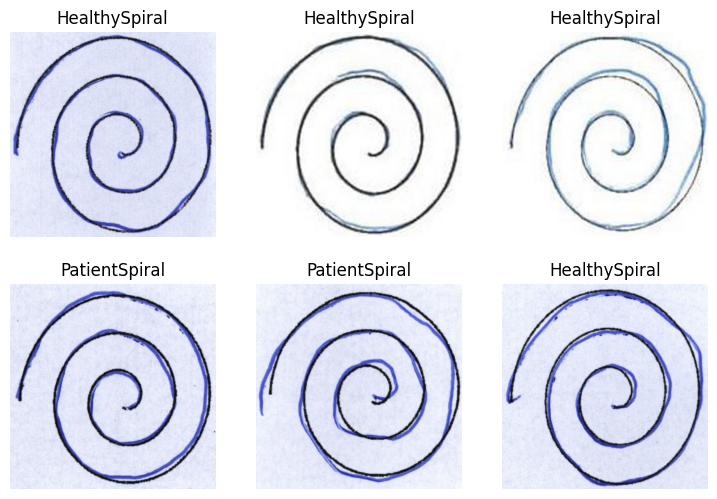

In [17]:
dls = ImageDataLoaders.from_folder(
    circle_path, bs=8, valid_pct=0.2, seed=42,
    item_tfms=Resize(460),
    batch_tfms=[])

dls.show_batch(max_n=6)

In [18]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(12, 0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.968847,0.932767,0.207547,00:58


epoch,train_loss,valid_loss,error_rate,time
0,0.691727,0.365309,0.132075,00:07
1,0.687798,0.303643,0.075472,00:08
2,0.581918,0.510851,0.113208,00:07
3,0.573855,3.550766,0.245283,00:08
4,0.553476,0.178000,0.075472,00:08
5,0.403904,0.136834,0.056604,00:07
6,0.326277,0.203220,0.094340,00:08
7,0.243441,0.026062,0.000000,00:07
8,0.191102,0.017329,0.000000,00:08
9,0.182426,0.013570,0.000000,00:07


# Spiral

In [19]:
spiral_path = "drive/MyDrive/parkinsons/Circle"
files = get_image_files(spiral_path)
len(files)

66

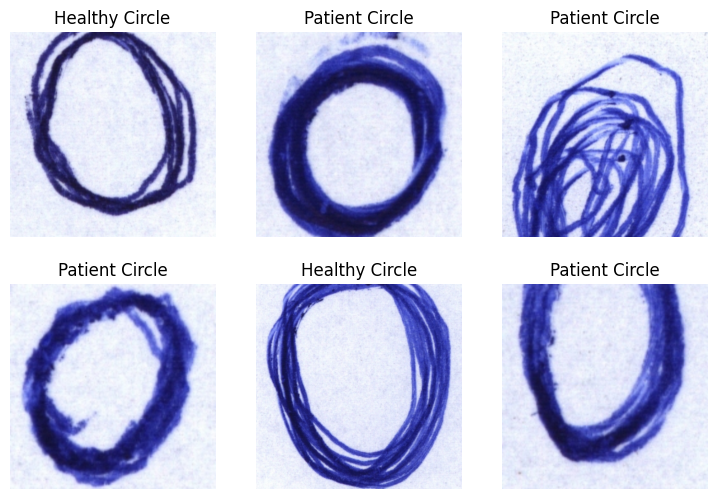

In [14]:
dls = ImageDataLoaders.from_folder(
    spiral_path, bs=8, valid_pct=0.2, seed=42,
    item_tfms=Resize(460),
    batch_tfms=[])

dls.show_batch(max_n=6)

In [15]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(12, 0.01)

epoch,train_loss,valid_loss,error_rate,time
0,1.626240,3.804392,0.461538,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.029970,0.560980,0.153846,00:02
1,1.056329,0.726104,0.153846,00:01
2,1.048592,0.462977,0.230769,00:02
3,0.930727,1.633743,0.153846,00:01
4,0.863374,1.275192,0.307692,00:01
5,0.802166,0.496159,0.230769,00:02
6,0.732841,0.588324,0.153846,00:02
7,0.678535,0.465538,0.153846,00:01
8,0.595985,0.518463,0.076923,00:01
9,0.510543,0.511154,0.076923,00:01
